# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

C:\Users\Natan\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 398

#### Question 2. Create a summary table

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GPA is between 0 and 4 so the standard deviation is more limited than GRE, which has a range between 0 and 800.

#### Question 4. Drop data points with missing data


In [17]:
df_raw = df_raw.dropna()

In [18]:
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I summed up all the values in df_raw that are Nan after dropping missing values and the sum is 0, as shown above.

#### Question 6. Create box plots for GRE and GPA

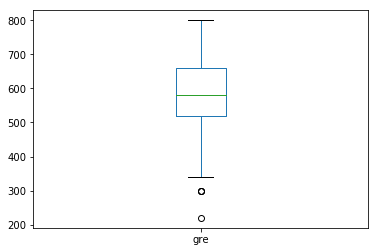

In [21]:
df_raw.gre.plot(kind= 'box')

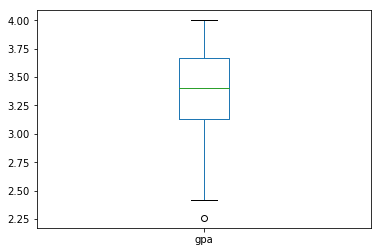

In [22]:
df_raw.gpa.plot(kind= 'box')

#### Question 7. What do this plots show?

Answer: These plots show the distribution of values for GRE and GPA, with the maximum and minimum shown, as well as the median.

#### Question 8. Describe each distribution 

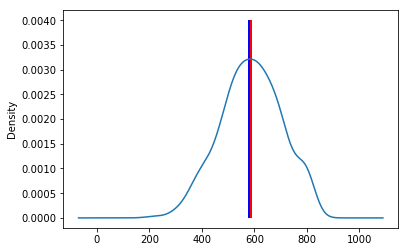

In [59]:
df_raw.gre.plot(kind = 'density')
plt.vlines(df_raw.gre.mean(),
           ymin=0, 
           ymax=0.004, 
           linewidth=2.0,
           color="red");

plt.vlines(df_raw.gre.median(),
           ymin=0, 
           ymax=0.004, 
           linewidth=2.0,
           color="blue");

# df_raw.gre.describe()
# df_raw.gre.skew()
# df_raw.gre.kurt()

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

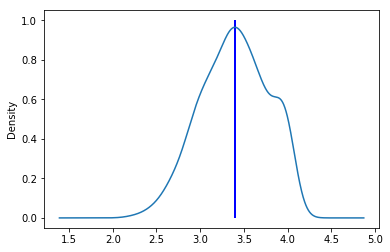

In [58]:
df_raw.gpa.plot(kind = 'density')
plt.vlines(df_raw.gpa.mean(),
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="red");

plt.vlines(df_raw.gpa.median(),
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="blue");

df_raw.gpa.describe()
# df_raw.gpa.skew()
# df_raw.gpa.kurt()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, as the skew and kurtosis of each of the GPA and GRE are not too far off the normal distribution assumption and the mean and median are almost identical for each.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No correction is needed as the skew and kurtosis are close to the normal distribution for both the GRE and GPA.

#### Question 11. Which of our variables are potentially colinear? 

In [60]:
df_raw.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE have a relatively high correlation of +0.38, which suggests that they are somewhate colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I will test whether GPA, GRE, and Prestige each individually have statistically significant coefficients in relatoin to the outcome of admittance or not. I will use linear regressions for each individual variable (GPA, GRE, Prestige) against admission, as well as including all three variables in a single regression. I will check that the coefficient has a p-value below 0.05 to conclude that the variable does indeed have a statistically significant effect on the probability of being admitted.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis that is that GPA and GRE are related colinear variables and will each be independently statistically significant variables, as will prestige. However, when GPA and GRE are both included in a single regression I suspect that the colinearity may cause problems in the data and mistakenly increase the estimated probability of admission.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data